In [42]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings            
warnings.filterwarnings("ignore") 


In [20]:
earthquake = pd.read_csv('data/earthquake.csv')

In [21]:
earthquake.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [35]:
earthquake.tail()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed
23411,12/30/2016,20:08:28,37.3973,141.4103,Earthquake,11.94,2.2,NaN,5.5,MB,...,428.0,97.00,0.681,4.5,0.9100,US10007NTD,US,US,US,Reviewed


In [24]:
earthquake.isnull().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

In [28]:
bos_toplam = earthquake.isna().sum()
bos_yuzde = earthquake.isna().sum()/earthquake.isna().count()

In [32]:
bos_degerler = pd.concat([bos_toplam, bos_yuzde], axis = 1, keys = [ 'bos_toplam', 'bos_yuzde'])
bos_degerler

,bos_toplam,bos_yuzde
Date,0,0.000000
Time,0,0.000000
Latitude,0,0.000000
Longitude,0,0.000000
Type,0,0.000000
Depth,0,0.000000
Depth Error,18951,0.809457
Depth Seismic Stations,16315,0.696865
Magnitude,0,0.000000
Magnitude Type,3,0.000128


In [56]:
bos_degerler.bos_yuzde.sort_values(ascending=False)[0:10]

Magnitude Error               0.986033
Horizontal Error              0.950624
Horizontal Distance           0.931488
Magnitude Seismic Stations    0.890484
Depth Error                   0.809457
Depth Seismic Stations        0.696865
Azimuthal Gap                 0.688237
Root Mean Square              0.258842
Magnitude Type                0.000128
Time                          0.000000
Name: bos_yuzde, dtype: float64

In [60]:
earthquake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
Date                          23412 non-null object
Time                          23412 non-null object
Latitude                      23412 non-null float64
Longitude                     23412 non-null float64
Type                          23412 non-null object
Depth                         23412 non-null float64
Depth Error                   4461 non-null float64
Depth Seismic Stations        7097 non-null float64
Magnitude                     23412 non-null float64
Magnitude Type                23409 non-null object
Magnitude Error               327 non-null float64
Magnitude Seismic Stations    2564 non-null float64
Azimuthal Gap                 7299 non-null float64
Horizontal Distance           1604 non-null float64
Horizontal Error              1156 non-null float64
Root Mean Square              17352 non-null float64
ID                            23412 non-null object
Sou

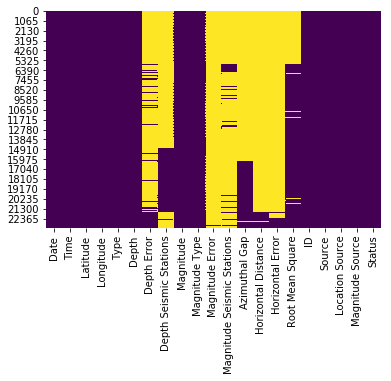

In [48]:
sns.heatmap(earthquake.isnull(), cbar=False, cmap='viridis')

In [106]:
columns_with_na_dropped = earthquake.drop(["Magnitude Error", "Horizontal Error",'Horizontal Distance'], axis=1)

In [108]:
print("Columns in original dataset: %d \n" % earthquake.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original dataset: 21 

Columns with na's dropped: 18


****bos degerlerin info sunu yazdirma???????????****

In [107]:
earthquake_filled = columns_with_na_dropped

In [86]:
earthquake_filled.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Seismic Stations', 'Azimuthal Gap', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

**bosluklarin bolgeye ve date e gore doldurlmasi**

In [87]:
fill_list_int = ['Magnitude Seismic Stations', 'Depth Error', 'Depth Seismic Stations', 'Azimuthal Gap', 'Root Mean Square']

for col in fill_list_int:
    earthquake_filled.groupby(by= ['Location Source','Date']).mean()

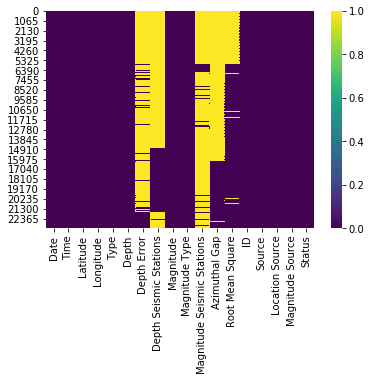

In [88]:
sns.heatmap(earthquake_filled.isnull(), cmap='viridis')

**Bu sonuc getirmedi Bu yuzden date sutununu yila cevirmek gerekiyor**

In [89]:
earthquake_filled['Date'] = pd.to_datetime(df['Date'])

earthquake_filled['year'] = earthquake_filled['Date'].dt.year

In [90]:
earthquake_filled.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Seismic Stations,Azimuthal Gap,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,year
0,1965-01-02,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965
1,1965-01-04,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965
2,1965-01-05,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965
3,1965-01-08,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965
4,1965-01-09,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965


In [91]:
fill_list_int = ['Magnitude Seismic Stations', 'Depth Error', 'Depth Seismic Stations', 'Azimuthal Gap', 'Root Mean Square']

for col in fill_list_int:
    earthquake_filled.groupby(by= ['Location Source','year']).mean()

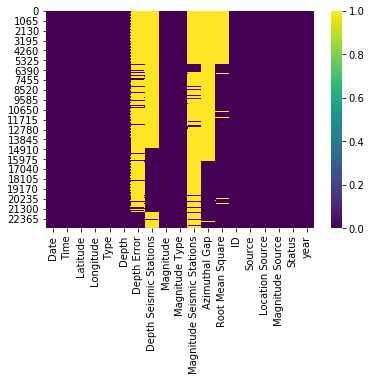

In [92]:
sns.heatmap(earthquake_filled.isnull(), cmap= 'viridis')

In [93]:
for col in fill_list_int:
    earthquake_filled[col] = earthquake_filled.groupby('year')[col].transform(lambda x: x.fillna(np.round(x.mean())))

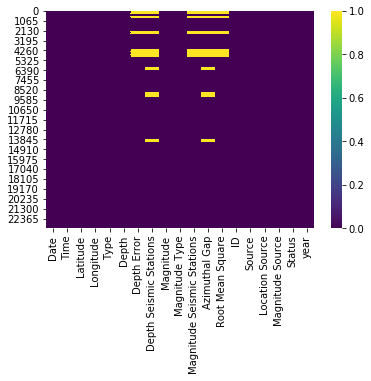

In [94]:
sns.heatmap(earthquake_filled.isnull(), cmap= 'viridis')

**bosluklari kendinden sonra gelen degerle doldurma**

In [110]:
earthquake_filled.fillna(method = 'bfill', axis=0).fillna(0)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Seismic Stations,Azimuthal Gap,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,31.61,13.0,6.0,MW,4.0,335.00,0.6000,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,31.61,13.0,5.8,MW,4.0,335.00,0.6000,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,31.61,13.0,6.2,MW,4.0,335.00,0.6000,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,31.61,13.0,5.8,MW,4.0,335.00,0.6000,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,31.61,13.0,5.8,MW,4.0,335.00,0.6000,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
5,01/10/1965,13:36:32,-13.4050,166.6290,Earthquake,35.00,31.61,13.0,6.7,MW,4.0,335.00,0.6000,ISCGEM860922,ISCGEM,ISCGEM,ISCGEM,Automatic
6,01/12/1965,13:32:25,27.3570,87.8670,Earthquake,20.00,31.61,13.0,5.9,MW,4.0,335.00,0.6000,ISCGEM861007,ISCGEM,ISCGEM,ISCGEM,Automatic
7,01/15/1965,23:17:42,-13.3090,166.2120,Earthquake,35.00,31.61,13.0,6.0,MW,4.0,335.00,0.6000,ISCGEM861111,ISCGEM,ISCGEM,ISCGEM,Automatic
8,01/16/1965,11:32:37,-56.4520,-27.0430,Earthquake,95.00,31.61,13.0,6.0,MW,4.0,335.00,0.6000,ISCGEMSUP861125,ISCGEMSUP,ISCGEM,ISCGEM,Automatic
9,01/17/1965,10:43:17,-24.5630,178.4870,Earthquake,565.00,31.61,13.0,5.8,MW,4.0,335.00,0.6000,ISCGEM861148,ISCGEM,ISCGEM,ISCGEM,Automatic


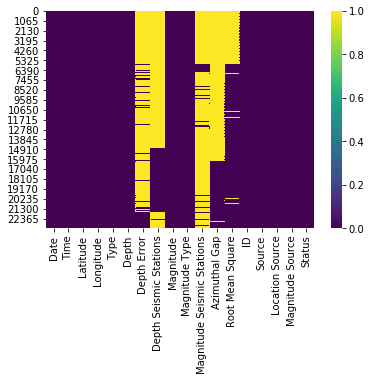

In [111]:
sns.heatmap(earthquake_filled.isnull(), cmap= 'viridis')

In [112]:
earthquake_filled.fillna(0)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Seismic Stations,Azimuthal Gap,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,0.0,0.0,6.0,MW,0.0,0.00,0.0000,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,0.0,0.0,5.8,MW,0.0,0.00,0.0000,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,0.0,0.0,6.2,MW,0.0,0.00,0.0000,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,0.0,0.0,5.8,MW,0.0,0.00,0.0000,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,0.0,0.0,5.8,MW,0.0,0.00,0.0000,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
5,01/10/1965,13:36:32,-13.4050,166.6290,Earthquake,35.00,0.0,0.0,6.7,MW,0.0,0.00,0.0000,ISCGEM860922,ISCGEM,ISCGEM,ISCGEM,Automatic
6,01/12/1965,13:32:25,27.3570,87.8670,Earthquake,20.00,0.0,0.0,5.9,MW,0.0,0.00,0.0000,ISCGEM861007,ISCGEM,ISCGEM,ISCGEM,Automatic
7,01/15/1965,23:17:42,-13.3090,166.2120,Earthquake,35.00,0.0,0.0,6.0,MW,0.0,0.00,0.0000,ISCGEM861111,ISCGEM,ISCGEM,ISCGEM,Automatic
8,01/16/1965,11:32:37,-56.4520,-27.0430,Earthquake,95.00,0.0,0.0,6.0,MW,0.0,0.00,0.0000,ISCGEMSUP861125,ISCGEMSUP,ISCGEM,ISCGEM,Automatic
9,01/17/1965,10:43:17,-24.5630,178.4870,Earthquake,565.00,0.0,0.0,5.8,MW,0.0,0.00,0.0000,ISCGEM861148,ISCGEM,ISCGEM,ISCGEM,Automatic


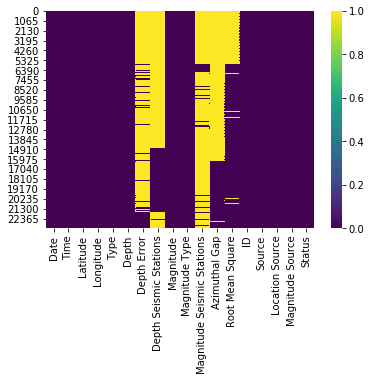

In [113]:
sns.heatmap(earthquake_filled.isnull(), cmap= 'viridis')

In [115]:
for col in fill_list_int:
    earthquake_filled[col] = earthquake_filled.groupby('Source')[col].transform(lambda x: x.fillna(np.round(x.mode())))

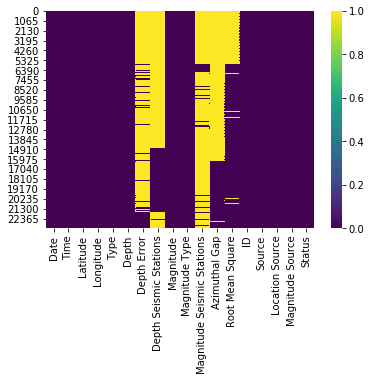

In [116]:
sns.heatmap(earthquake_filled.isnull(), cmap= 'viridis')

In [120]:
earthquake_filled.groupby("year").transform(lambda x: x.fillna(x.mean())) 

KeyError: 'year'

** Kategorik olan eksik degiskenlerin tespiti ve doldurulmasi**
**Acaba deger kayip mi yoksa hic gerceklesmedi mi?--> Degerler var ama eksik**

In [96]:
fill_list_str= ['Magnitude Type']

**hangi satirlarda eksik oldugunun bulunmasi**

In [95]:
earthquake_filled[earthquake_filled['Magnitude Type'].isna()]

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Seismic Stations,Azimuthal Gap,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,year
6703,1983-08-24,13:36:00,40.3732,-124.9227,Earthquake,11.93,3.0,64.0,5.70,NaN,33.0,227.0,1.0,ATLAS19830824133600,ATLAS,ATLAS,ATLAS,Automatic,1983
7294,1984-11-23,18:08:00,37.4600,-118.5900,Earthquake,9.00,3.0,54.0,5.82,NaN,40.0,112.0,1.0,ATLAS19841123180800,ATLAS,ATLAS,ATLAS,Automatic,1984
7919,1986-03-31,11:55:00,37.4788,-121.6858,Earthquake,9.17,6.0,35.0,5.60,NaN,19.0,106.0,1.0,ATLAS19860331115500,ATLAS,ATLAS,ATLAS,Automatic,1986


**daha once Atlas merkezli gecmis olan herhangi bir Magnitude Type verisi var mi?**

In [97]:
earthquake_filled[ earthquake_filled[ 'Magnitude Type'] == 'ATLAS']

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Seismic Stations,Azimuthal Gap,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,year


**oncesinde veri setinde gecmemis, Location Source ve Source sutunlari ile aratalim**

In [102]:
earthquake_filled[ earthquake_filled['Source'] == 'ATLAS']

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Seismic Stations,Azimuthal Gap,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,year
6703,1983-08-24,13:36:00,40.3732,-124.9227,Earthquake,11.93,3.0,64.0,5.70,NaN,33.0,227.0,1.0,ATLAS19830824133600,ATLAS,ATLAS,ATLAS,Automatic,1983
7294,1984-11-23,18:08:00,37.4600,-118.5900,Earthquake,9.00,3.0,54.0,5.82,NaN,40.0,112.0,1.0,ATLAS19841123180800,ATLAS,ATLAS,ATLAS,Automatic,1984
7919,1986-03-31,11:55:00,37.4788,-121.6858,Earthquake,9.17,6.0,35.0,5.60,NaN,19.0,106.0,1.0,ATLAS19860331115500,ATLAS,ATLAS,ATLAS,Automatic,1986


In [99]:
earthquake_filled[ earthquake_filled['Location Source'] == 'ATLAS']

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Seismic Stations,Azimuthal Gap,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,year
6703,1983-08-24,13:36:00,40.3732,-124.9227,Earthquake,11.93,3.0,64.0,5.70,NaN,33.0,227.0,1.0,ATLAS19830824133600,ATLAS,ATLAS,ATLAS,Automatic,1983
7294,1984-11-23,18:08:00,37.4600,-118.5900,Earthquake,9.00,3.0,54.0,5.82,NaN,40.0,112.0,1.0,ATLAS19841123180800,ATLAS,ATLAS,ATLAS,Automatic,1984
7919,1986-03-31,11:55:00,37.4788,-121.6858,Earthquake,9.17,6.0,35.0,5.60,NaN,19.0,106.0,1.0,ATLAS19860331115500,ATLAS,ATLAS,ATLAS,Automatic,1986


**yine ayni 3 satir karsimiza cikiyor bu satirlar oncesinde Atlas bolgesi icin veriye sahip degil**

In [105]:
earthquake_filled['Location Source'].unique()

array(['ISCGEM', 'CI', 'US', 'H', 'U', 'G', 'NC', 'B', 'GCMT', 'AG', 'UW',
       'SPE', 'HVO', 'BRK', 'ATLAS', 'AGS', 'PGC', 'BOU', 'SLC', 'OTT',
       'AEI', 'AEIC', 'CASC', 'ISK', 'ATH', 'THE', 'ROM', 'MDD', 'WEL',
       'GUC', 'UNM', 'CSEM', 'RSPR', 'JMA', 'NN', 'CAR', 'SJA', 'TEH',
       'BEO', 'UCR', 'SE', 'TUL', 'TAP', 'THR', 'LIM', 'US_WEL', 'AK',
       'PR'], dtype=object)

ISCGEM = International Seismological Centre